In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))



In [2]:
from convert_txt_to_csv import convert_txt_to_csv
from data_summary import calculate_descriptive_stats, check_data_structure
from data_quality import check_missing_values
from univariate_analysis import plot_numerical_distributions, plot_categorical_distributions
from bivariate_analysis import calculate_correlations, scatter_plot
from data_comparison import compare_by_category
from outlier_detection import detect_outliers
from visualizations import plot_trend, plot_heatmap

In [4]:
input_file = "../Data/MachineLearningRating_v3.txt"
output_file = "../Data/insurance_data.csv"

convert_txt_to_csv(input_file, output_file)


File converted successfully and saved to ../Data/insurance_data.csv


In [5]:
import pandas as pd

# Load the converted CSV file
df = pd.read_csv(output_file)

# Display basic info
print(df.info())
print(df.head())
print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count    Dtype 
---  ------                                                                                                                                                                                                         

In [6]:
# Verify the column name
print(df.columns)

Index(['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims'], dtype='object')


In [7]:
# Access the single column using its name
column_name = df.columns[0]

# Split the column into separate columns based on the delimiter '|'
data = df[column_name].str.split('|', expand=True)

# Rename columns to meaningful names
columns = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth", "IsVATRegistered",
    "Citizenship", "LegalType", "Title", "Language", "Bank", "AccountType",
    "MaritalStatus", "Gender", "Country", "Province", "PostalCode", 
    "MainCrestaZone", "SubCrestaZone", "ItemType", "mmcode", "VehicleType",
    "RegistrationYear", "make", "Model", "Cylinders", "cubiccapacity",
    "kilowatts", "bodytype", "NumberOfDoors", "VehicleIntroDate",
    "CustomValueEstimate", "AlarmImmobiliser", "TrackingDevice",
    "CapitalOutstanding", "NewVehicle", "WrittenOff", "Rebuilt", 
    "Converted", "CrossBorder", "NumberOfVehiclesInFleet", "SumInsured",
    "TermFrequency", "CalculatedPremiumPerTerm", "ExcessSelected",
    "CoverCategory", "CoverType", "CoverGroup", "Section", "Product",
    "StatutoryClass", "StatutoryRiskType", "TotalPremium", "TotalClaims"
]

# Assign the new column names to the DataFrame
data.columns = columns

# Check the resulting DataFrame
print(data.head())


  UnderwrittenCoverID PolicyID     TransactionMonth IsVATRegistered  \
0              145249    12827  2015-03-01 00:00:00            True   
1              145249    12827  2015-05-01 00:00:00            True   
2              145249    12827  2015-07-01 00:00:00            True   
3              145255    12827  2015-05-01 00:00:00            True   
4              145255    12827  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Wind

In [17]:
numerical_columns = ['TotalPremium', 'TotalClaims']
categorical_columns = ['CoverCategory', 'CoverGroup', 'VehicleType']

print(categorical_columns)
print(numerical_columns)


['CoverCategory', 'CoverGroup', 'VehicleType']
['TotalPremium', 'TotalClaims']


In [9]:
# 1. Data Summarization
print(calculate_descriptive_stats(data, numerical_columns))
print(check_data_structure(data))

         TotalPremium    TotalClaims
count         1000098        1000098
unique          38959           1615
top     .000000000000  .000000000000
freq           381634         997305
UnderwrittenCoverID         object
PolicyID                    object
TransactionMonth            object
IsVATRegistered             object
Citizenship                 object
LegalType                   object
Title                       object
Language                    object
Bank                        object
AccountType                 object
MaritalStatus               object
Gender                      object
Country                     object
Province                    object
PostalCode                  object
MainCrestaZone              object
SubCrestaZone               object
ItemType                    object
mmcode                      object
VehicleType                 object
RegistrationYear            object
make                        object
Model                       object
Cylinders 

In [10]:
# 2. Data Quality Assessment
print("Missing Values:\n", check_missing_values(data))


Missing Values:
 UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding     

In [25]:
# Confirm numerical columns are numeric
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(data[column]):
        print(f"Column {column} is not numeric. Attempting conversion...")
        data[column] = pd.to_numeric(data[column], errors='coerce')


Column TotalPremium is not numeric. Attempting conversion...
Column TotalClaims is not numeric. Attempting conversion...


c:\Users\hp\Desktop\WEEJ3\week-3_tenx\scripts\univariate_analysis.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', bw_adjust=1.5)


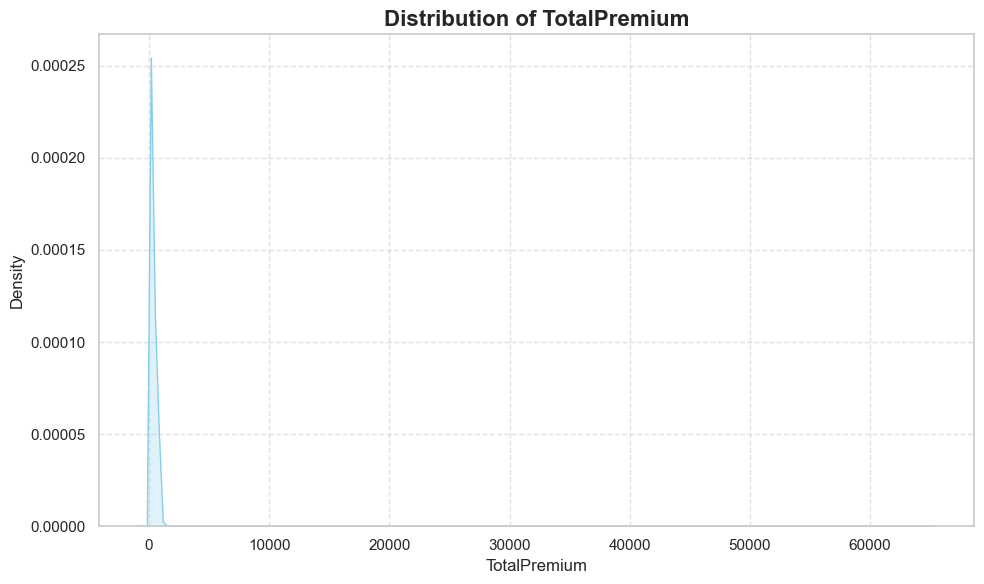

c:\Users\hp\Desktop\WEEJ3\week-3_tenx\scripts\univariate_analysis.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='skyblue', bw_adjust=1.5)


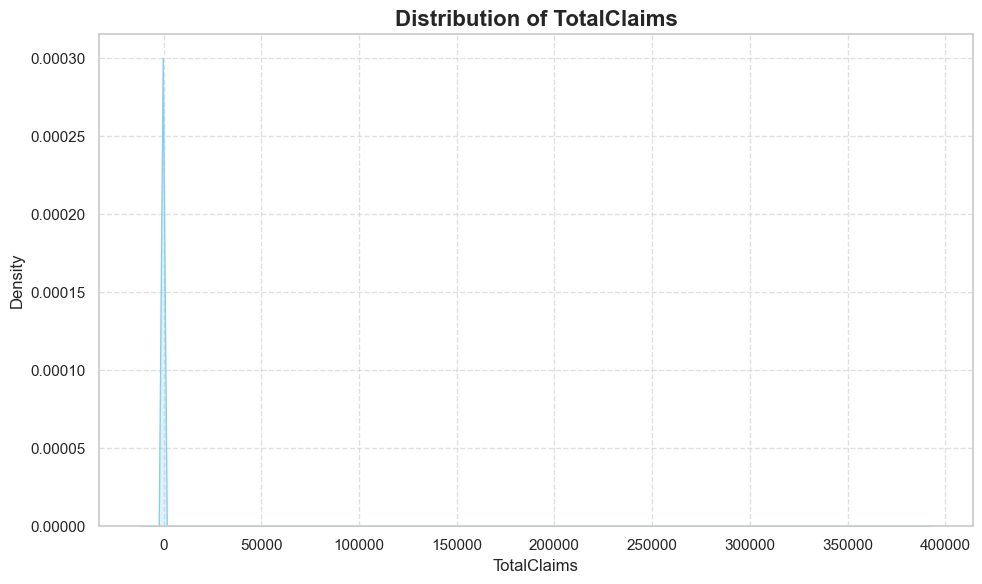

c:\Users\hp\Desktop\WEEJ3\week-3_tenx\scripts\univariate_analysis.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette="viridis", order=data[column].value_counts().index)


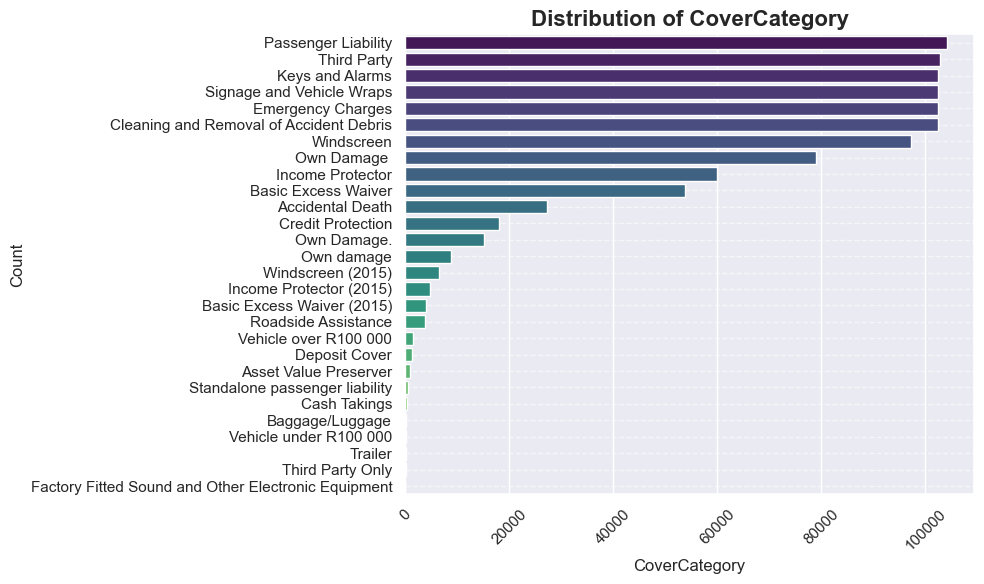

c:\Users\hp\Desktop\WEEJ3\week-3_tenx\scripts\univariate_analysis.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette="viridis", order=data[column].value_counts().index)


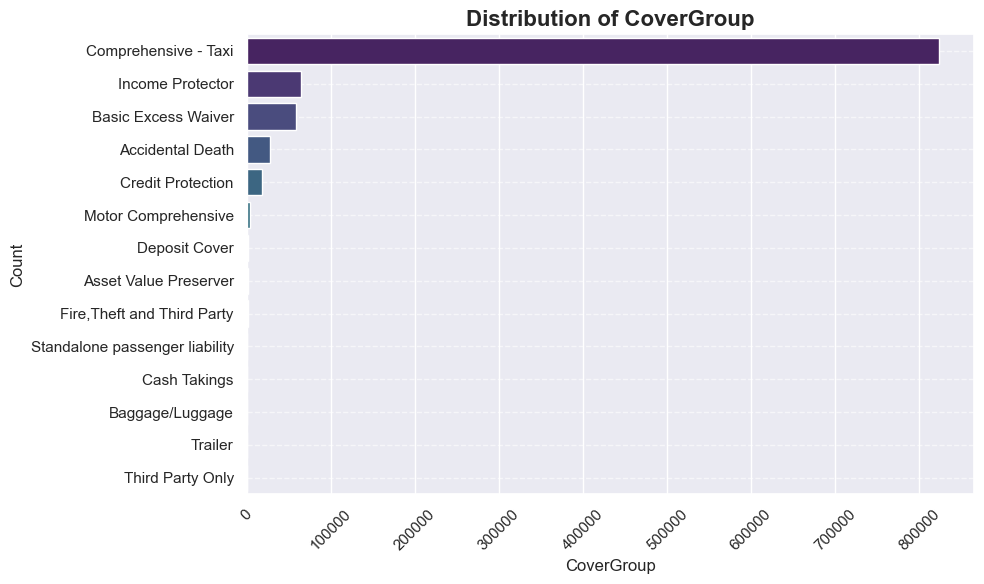

c:\Users\hp\Desktop\WEEJ3\week-3_tenx\scripts\univariate_analysis.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette="viridis", order=data[column].value_counts().index)


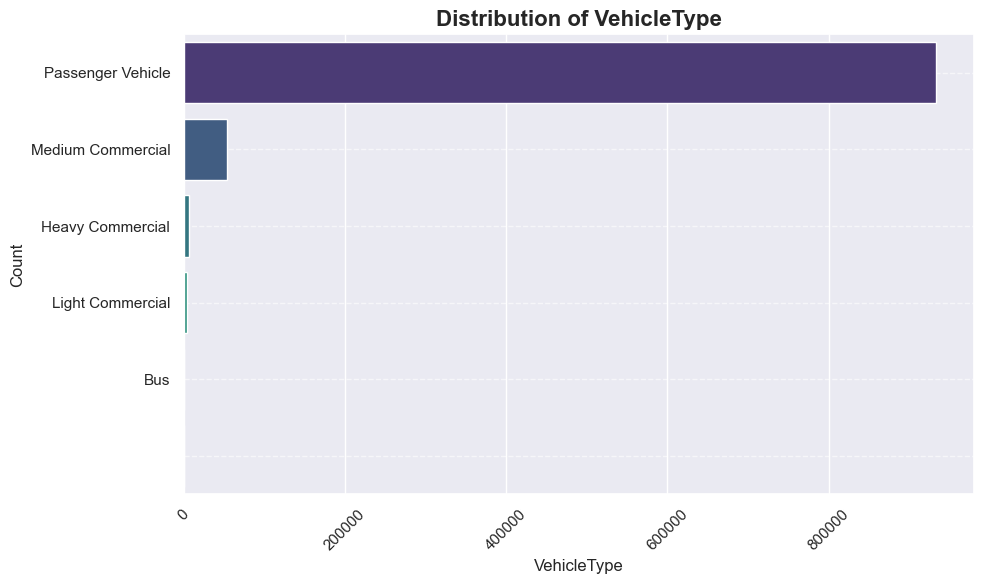

In [28]:
# 3. Univariate Analysis
plot_numerical_distributions(data, numerical_columns)
plot_categorical_distributions(data, categorical_columns)

              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


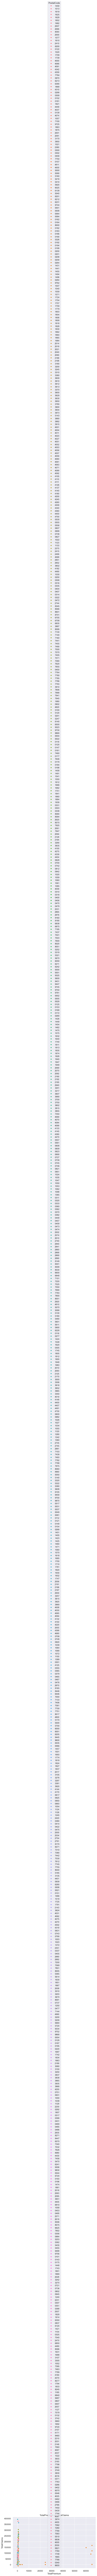

In [30]:
# 4. Bivariate Analysis
correlation_matrix = calculate_correlations(data, numerical_columns)
print(correlation_matrix)
scatter_plot(data, 'TotalPremium', 'TotalClaims', hue_col='PostalCode')


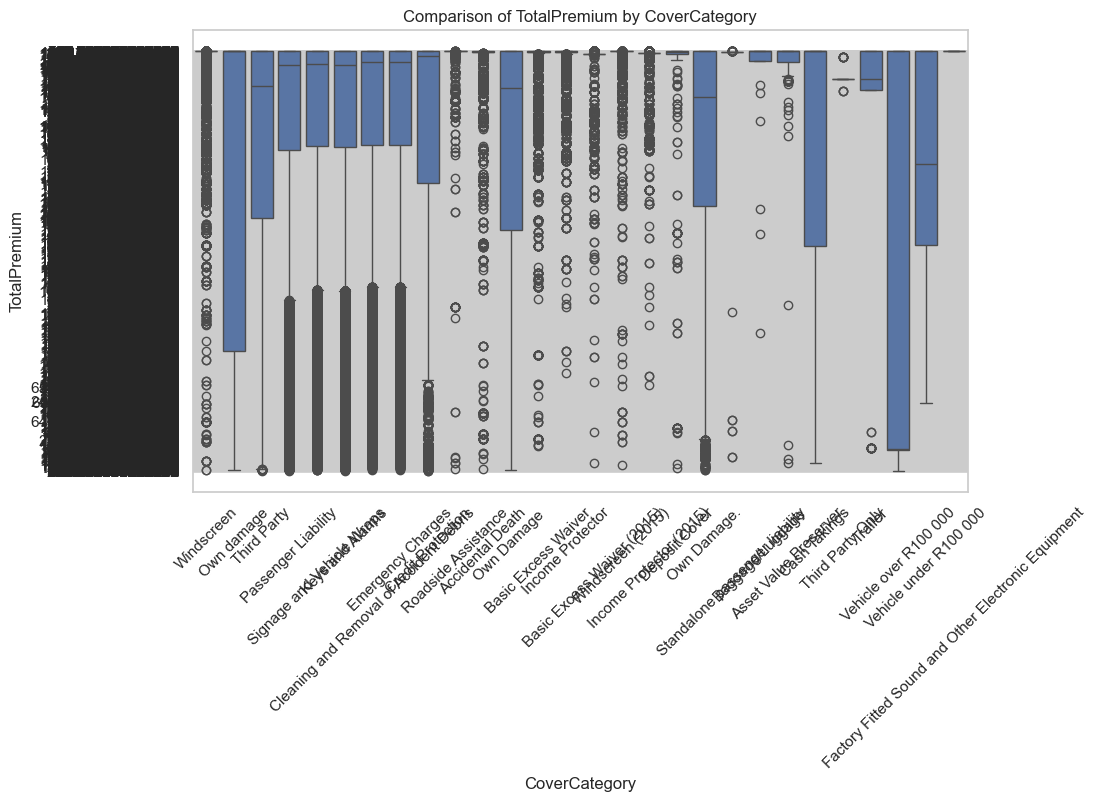

In [24]:
# 5. Data Comparison
compare_by_category(data, 'CoverCategory', 'TotalPremium')


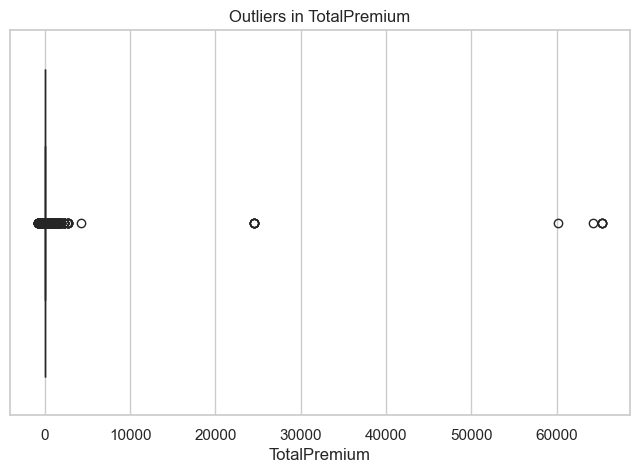

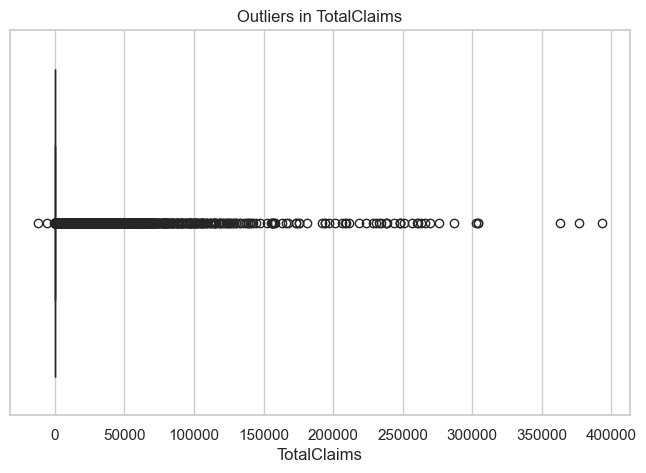

In [26]:
# 6. Outlier Detection
detect_outliers(data, numerical_columns)

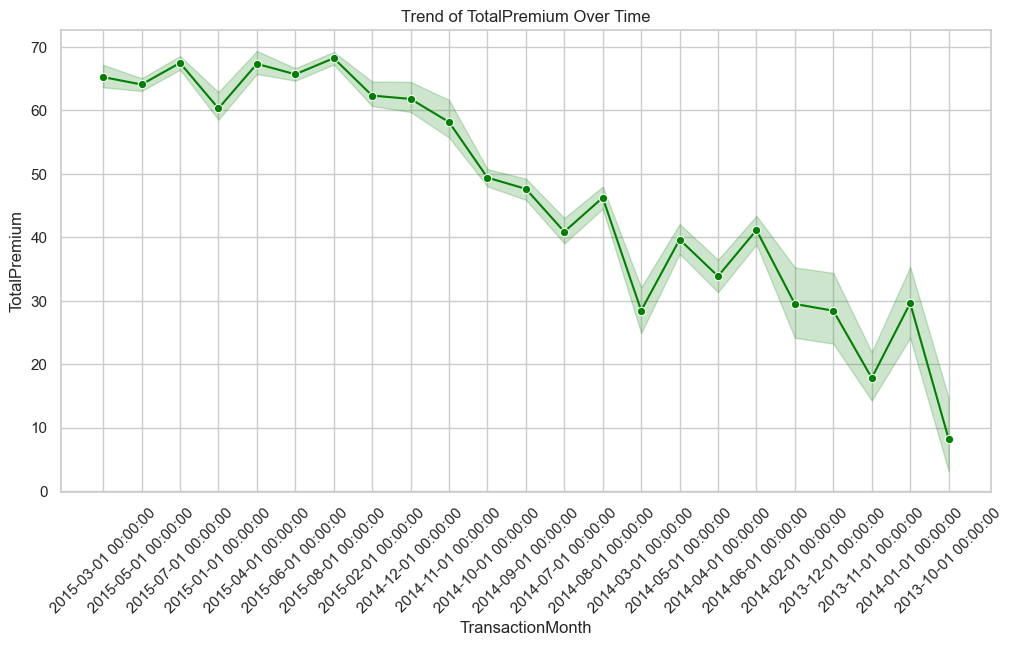

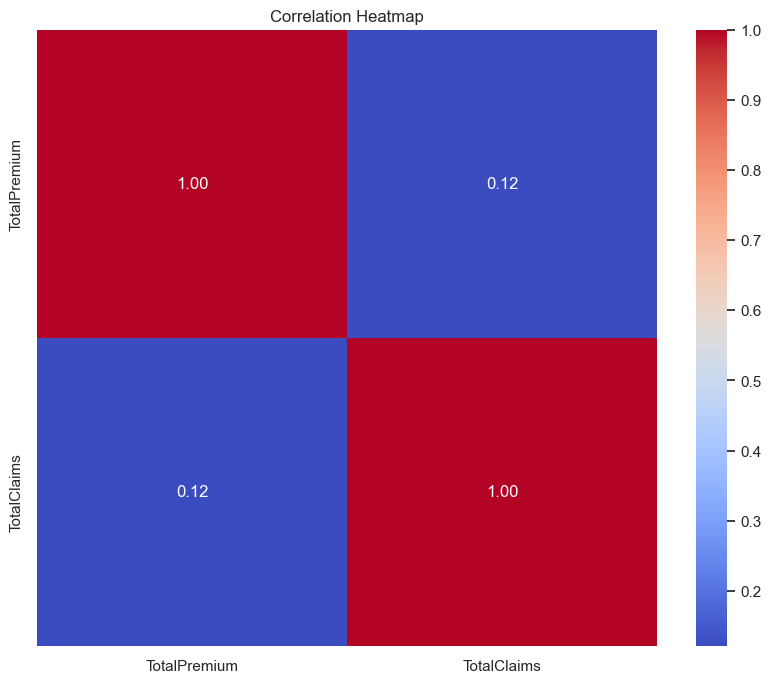

In [27]:
# 7. Visualization
plot_trend(data, 'TransactionMonth', 'TotalPremium')
plot_heatmap(correlation_matrix)